## Biblioteki i funkcje

In [1]:
%run ../scripts/init.py

%matplotlib inline

Wczytano bilioteki!


In [2]:
%run ../scripts/my_functions_02.py

In [3]:
%run ../scripts/load_data.py 'base_wo_with_primary_fe'

Zmienne: data. Pomyślnie wczytano dane z wstępnie przygotowanymi zmiennymi do analizy


In [4]:
np.random.seed(2017)

## Zmienne + Missings

In [5]:
feats = [
    'id_customer_sqrt',
    'missing_cnt', 
    'date_confirmed',
    'date_contract_open',
    'date_request_b',
    'date_start_sth',
#    'date_final_payment_loan_short',
    'duration_loan_short_yrs',
    'duration_loan_yrs_is_geq_10',
    'duration_account_days',
    'duration_confirmed_minus_contract_open_days',
    'duration_debt_days_limit_1',
#    'val_balance_curr_log',
    'val_credit_limit_log',
    'val_debt_amount_max_log',
#    'val_debt_curr_log',
#    'val_debt_overdue_curr_log',
#    'val_payment_next_log',
    'val_payment_next_log_divide_debt_curr_log',
    'code_b_is_1', 'code_b_is_2', 'code_b_is_3',
    'code_contract_type_is_7', 'code_contract_type_is_9', 'code_contract_type_is_99',
    'code_contract_status_is_0', 'code_contract_status_is_13', 'code_contract_status_is_52',
    'code_trustability_cnt_1_limit_to_2', 'code_trustability_cnt_2_limit_to_2', 'code_trustability_cnt_3_limit_to_2',
    'code_trustability_cnt_4_limit_to_2', 'code_trustability_cnt_5_limit_to_2', 'code_trustability_cnt_7_limit_to_2',
    'code_trustability_cnt_9_limit_to_2', 'code_trustability_cnt_a_limit_to_2', 'code_trustability_cnt_x_limit_to_2',
    'code_frequency_payments_is_0', 'code_frequency_payments_is_3', 'code_frequency_payments_is_7',
    'cnt_delay_30d_59d_limit_to_2',
    'cnt_delay_5d_29d_limit_to_2',
    'cnt_delay_60d_89d_limit_to_2',
    'cnt_delay_upto_30d_limit_to_2',
    'cnt_delay_upto_5d_limit_to_2',
    'cnt_delay_upto_90d_limit_to_2',
    'loan_rate_limit_5' ,
    'is_bad',
    'id_customer',
]

In [6]:
data = data[feats]

In [7]:
data.date_start_sth = data.date_start_sth.fillna(data.date_start_sth.median())
data.duration_loan_short_yrs = data.duration_loan_short_yrs.fillna(-1)
data.duration_debt_days_limit_1 = data.duration_debt_days_limit_1.fillna(-1)
data.val_debt_amount_max_log = data.val_debt_amount_max_log.fillna(data.val_debt_amount_max_log.median())
# data.val_debt_curr_log = data.duration_debt_days_limit_1.fillna(data.val_debt_curr_log.median())
# data.val_debt_overdue_curr_log = data.val_debt_amount_max_log.fillna(data.val_debt_overdue_curr_log.median())
data.val_payment_next_log_divide_debt_curr_log = data.val_payment_next_log_divide_debt_curr_log.fillna(-1) # do zastanowienia
data.code_trustability_cnt_1_limit_to_2 = data.code_trustability_cnt_1_limit_to_2.fillna(-1)
data.code_trustability_cnt_2_limit_to_2 = data.code_trustability_cnt_2_limit_to_2.fillna(-1)
data.code_trustability_cnt_3_limit_to_2 = data.code_trustability_cnt_3_limit_to_2.fillna(-1)
data.code_trustability_cnt_4_limit_to_2 = data.code_trustability_cnt_4_limit_to_2.fillna(-1)
data.code_trustability_cnt_5_limit_to_2 = data.code_trustability_cnt_5_limit_to_2.fillna(-1)
data.code_trustability_cnt_7_limit_to_2 = data.code_trustability_cnt_7_limit_to_2.fillna(-1)
data.code_trustability_cnt_9_limit_to_2 = data.code_trustability_cnt_9_limit_to_2.fillna(-1)
data.code_trustability_cnt_a_limit_to_2 = data.code_trustability_cnt_a_limit_to_2.fillna(-1)
data.code_trustability_cnt_x_limit_to_2 = data.code_trustability_cnt_x_limit_to_2.fillna(-1)

/home/jupyter/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


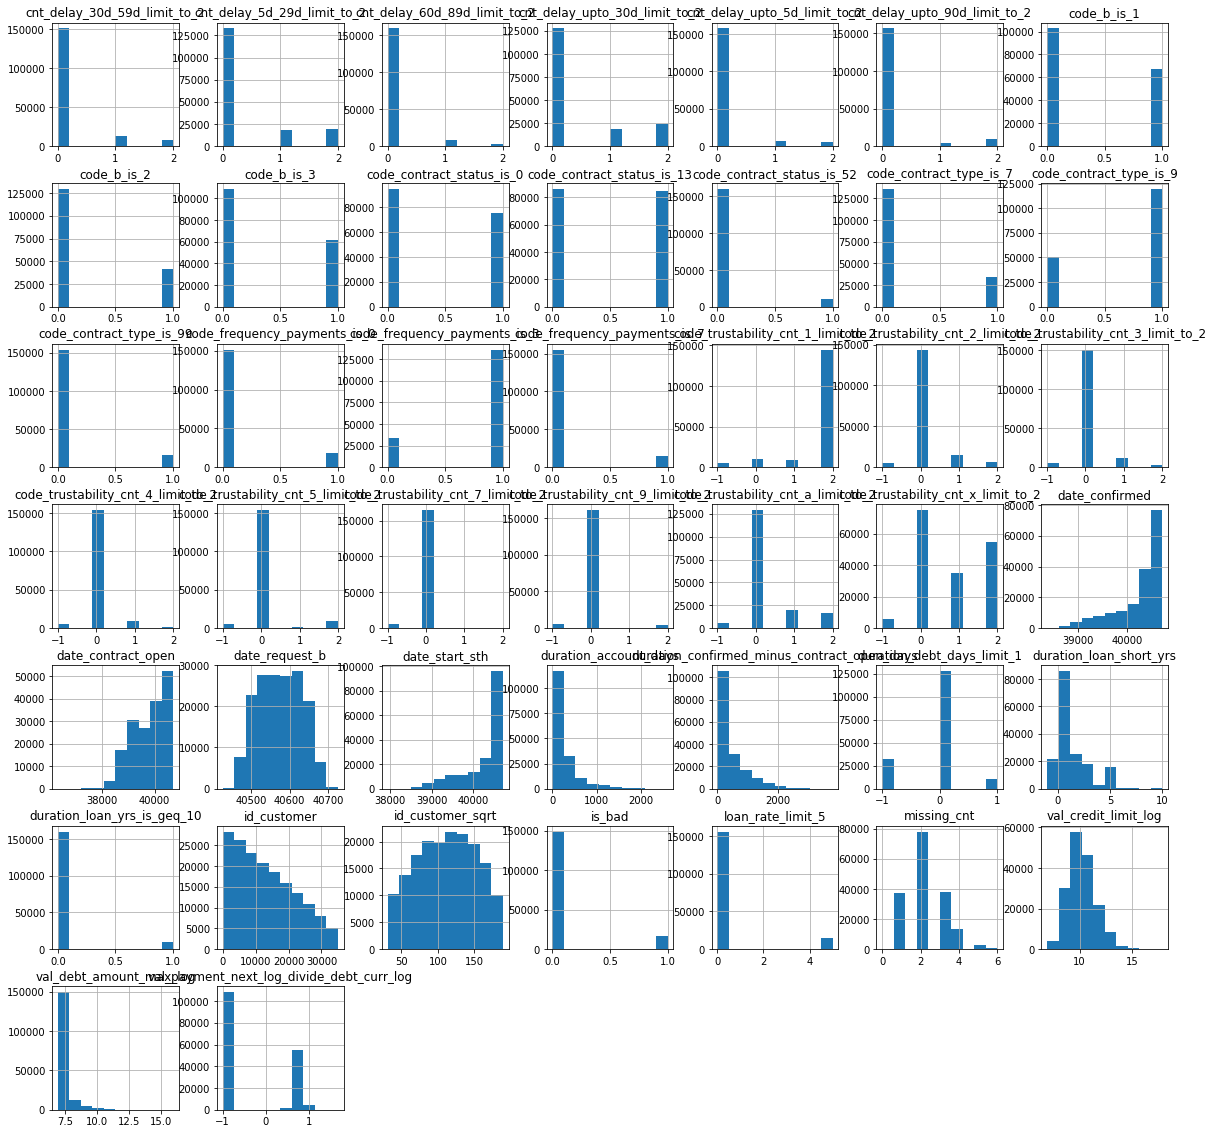

In [8]:
data.hist(figsize=(20,20));

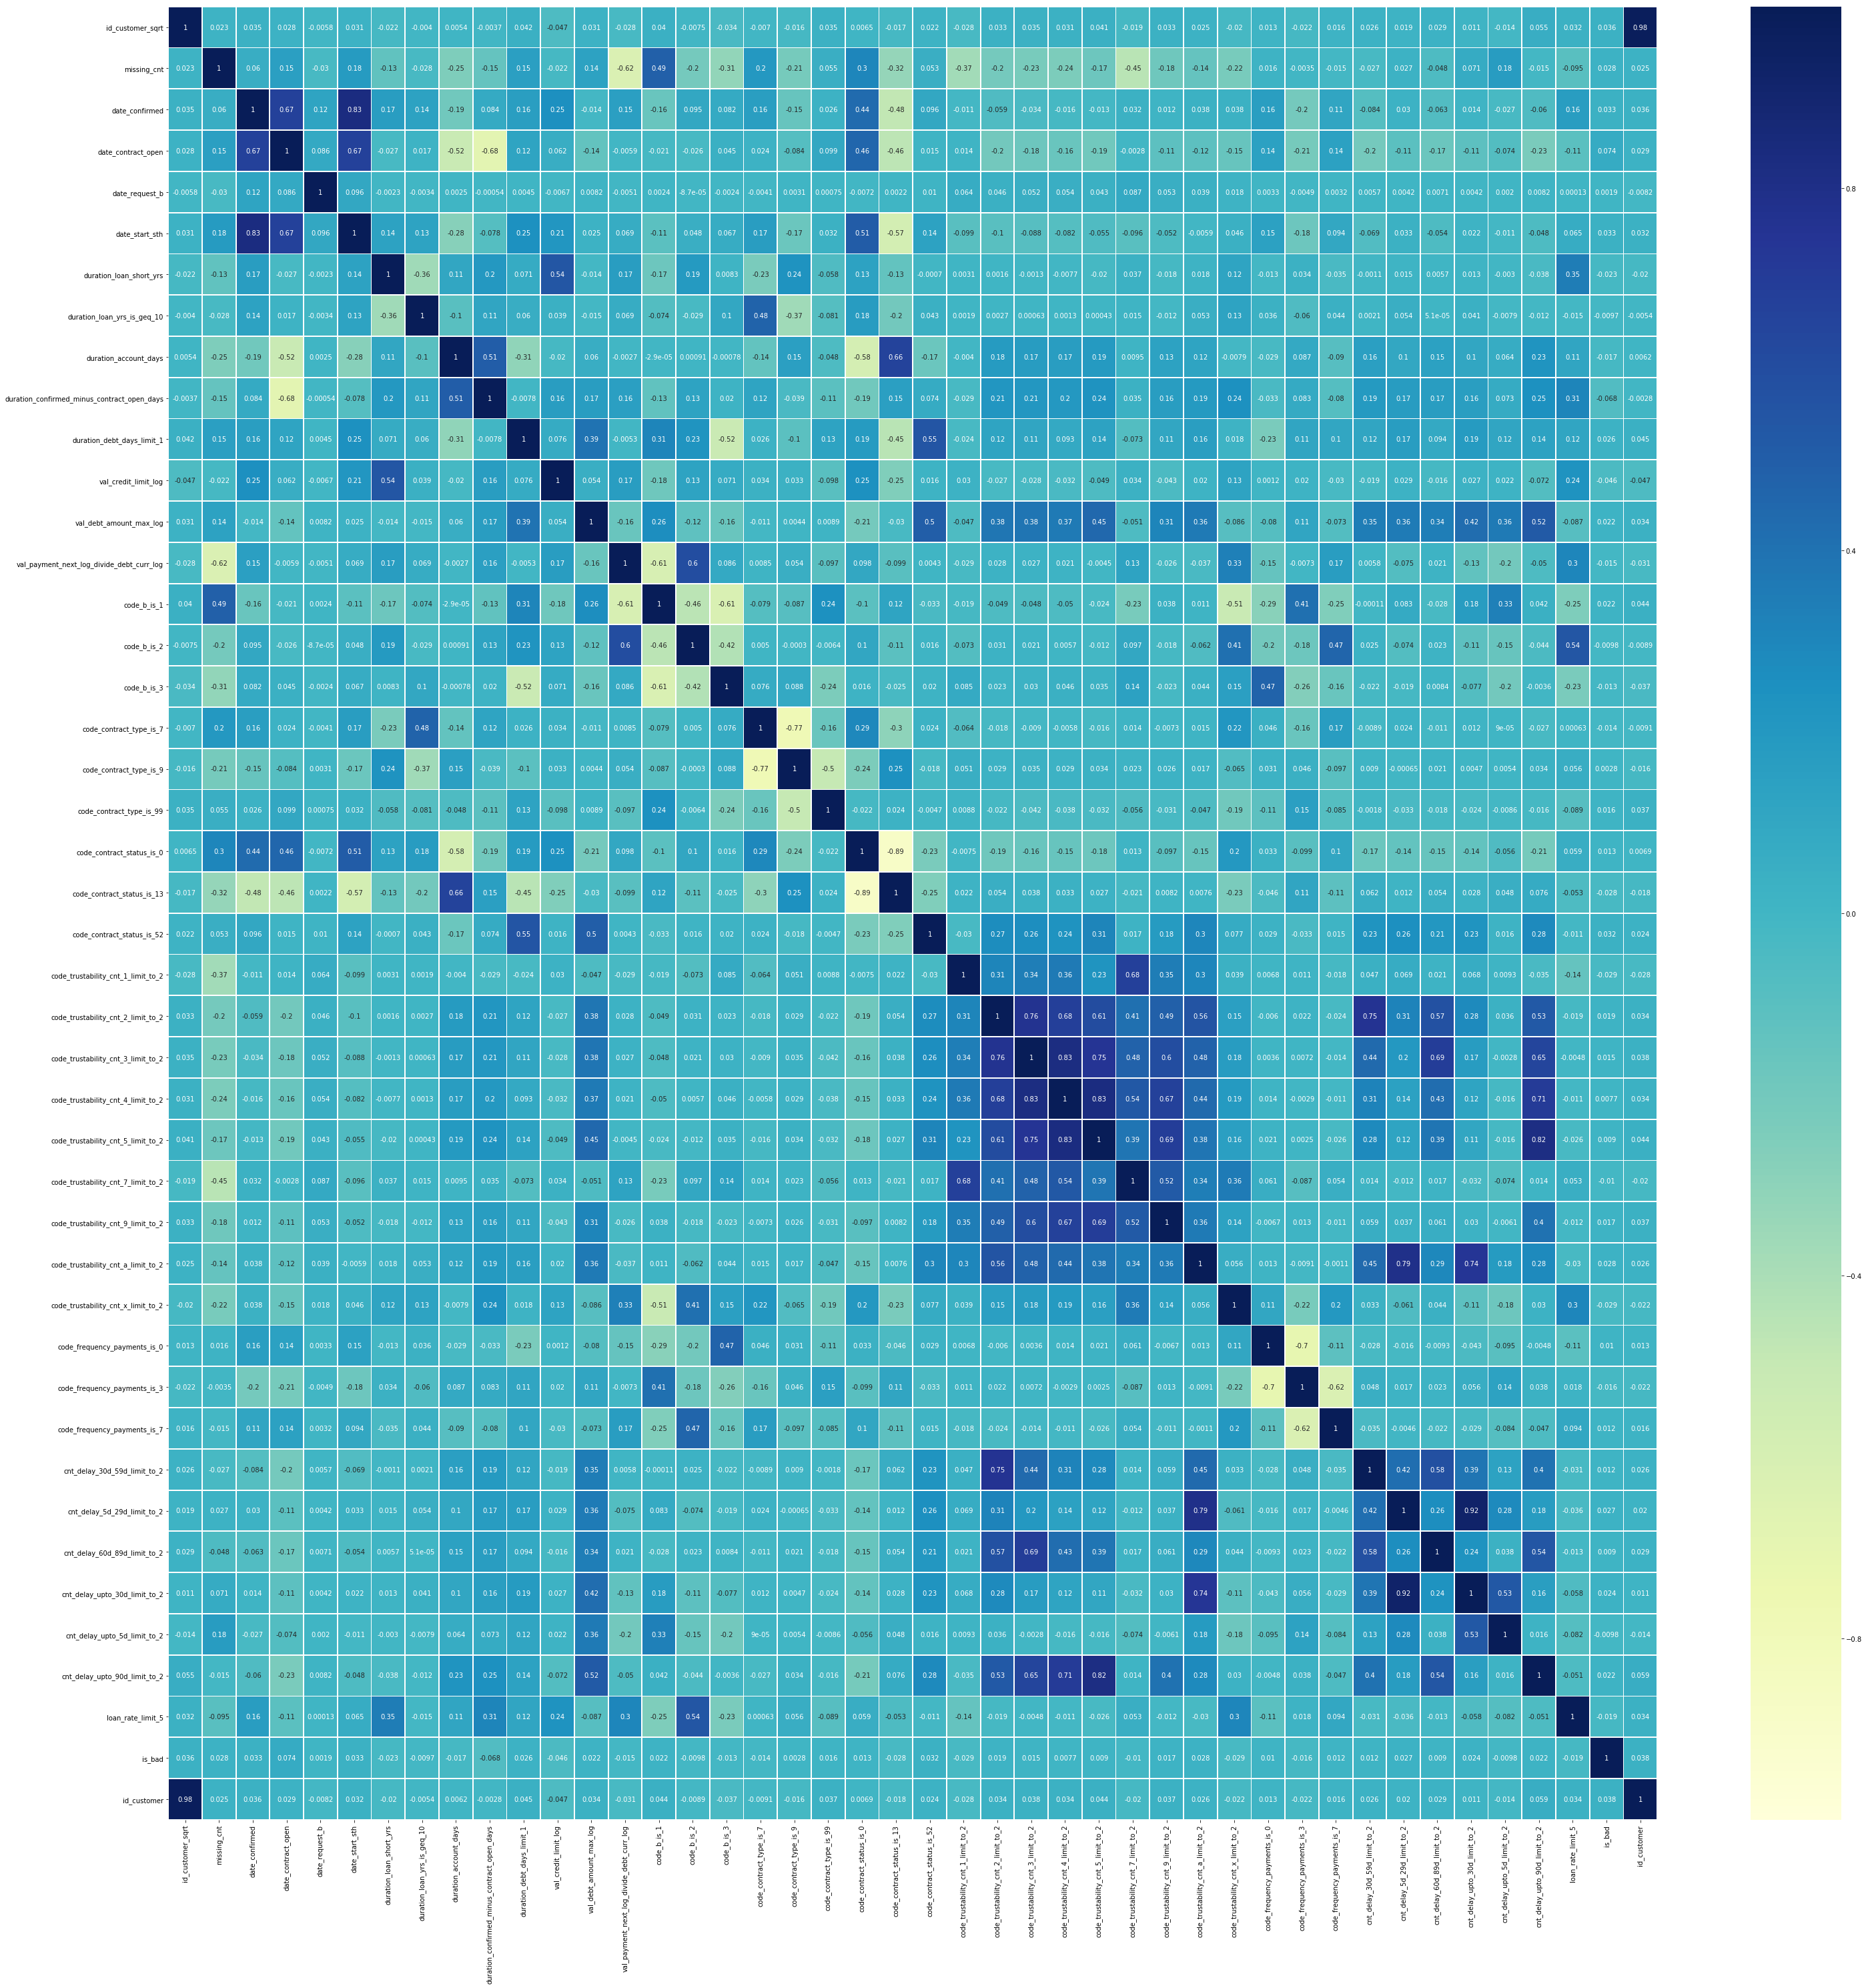

In [9]:
plt.rcParams['figure.figsize']=(50,50)
sns.heatmap(data.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

## TRAIN + TEST

In [10]:
train = data.loc[~np.isnan(data.is_bad)]
test = data.loc[np.isnan(data.is_bad), data.columns.drop('is_bad')]

In [11]:
X = train[train.columns.drop(['is_bad', 'id_customer'])]
y = train['is_bad']

Xt = test[test.columns.drop(['id_customer'])]

In [12]:
# xgb_rmodel = xgb.XGBClassifier().fit(X, y)
# xgbfir.saveXgbFI(xgb_rmodel.get_booster(), feature_names=X.columns, OutputXlsxFile = '../data/features_importance.xlsx')
# pd.read_excel('../data/features_importance.xlsx', 'Interaction Depth 0')

## CATBOOST + class_weights

In [13]:
# szukam najlepszych wag
def get_models():
    return [
        ('ctb', ctb.CatBoostClassifier(eval_metric='Logloss',class_weights=[1,7])),
        ('ctb', ctb.CatBoostClassifier(eval_metric='Logloss',class_weights=[1,7.5])),
        ('ctb', ctb.CatBoostClassifier(eval_metric='Logloss',class_weights=[0.9,7.5])),
        ('ctb', ctb.CatBoostClassifier(eval_metric='Logloss',class_weights=[1,8])),
    ]

run(X, y, models=get_models(), plot_lc=False)

[ctb]: 0.5676684381827989 +/-0.029260697524384763
[ctb]: 0.5666324147444418 +/-0.027937679216880628
[ctb]: 0.562707938765957 +/-0.02357391828448236
[ctb]: 0.5659900006736026 +/-0.024954191954197142


In [14]:
# pierwszy model

In [15]:
np.random.seed(2017)

In [16]:
model = ctb.CatBoostClassifier(eval_metric='Logloss',class_weights=[0.9,7.5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

res_auc = roc_auc_score(y_test, y_pred)
res_y_pred = model.predict(Xt)

print(res_auc)
print(sum(res_y_pred==True)/(sum(res_y_pred==True)+sum(res_y_pred==False)))

0.600238662998
0.250563409137


In [17]:
test['is_bad'] = res_y_pred # submission ~60%
test[['id_customer','is_bad']].rename(columns = {'id_customer':'customer_id'}).to_csv('../model_dummy_cat.csv', index=False)

In [171]:
# pomysł na prawdopodobieństwa

In [18]:
np.random.seed(2017)

In [19]:
model = ctb.CatBoostClassifier(eval_metric='Logloss',class_weights=[0.9,7.5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

res_auc = roc_auc_score(y_test, y_pred)
res_y_pred = model.predict_proba(Xt)

print(res_auc)
# print(sum(res_y_pred==True)/(sum(res_y_pred==True)+sum(res_y_pred==False)))

0.600250926421


In [20]:
test['is_bad'] = res_y_pred[:,1] # submission ~64%
test[['id_customer','is_bad']].rename(columns = {'id_customer':'customer_id'}).to_csv('../model_dummy_cat_prob.csv', index=False)